In [1]:
!git clone https://github.com/AusterweilLab/snafu-py
!git clone https://github.com/HNinou/MathTools_TD1
!pip install snafu-py/.

Cloning into 'snafu-py'...
remote: Enumerating objects: 5174, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 5174 (delta 49), reused 99 (delta 23), pack-reused 5036 (from 1)
Receiving objects: 100% (5174/5174), 34.42 MiB | 7.63 MiB/s, done.
Resolving deltas: 100% (2931/2931), done.
Cloning into 'MathTools_TD1'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 102.29 KiB | 2.69 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Processing ./snafu-py
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysnafu: filename=pysnafu-2.6-py3-none-any.whl size=46141 sha256=cb48c6e2251aada0765d628f64b5cabcedb4390e623d7

In [2]:
import snafu
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns

# Antique coin collection

##7)

In [3]:

def coin_sampling_one_experiment(N=1000,k=10):
  coin_sample = np.random.choice(range(N), size = k)
  #print(coin_sample)
  m = max(coin_sample) #max of the sample
  theta_hat = m*(1+1/k)-1
  mu = (m-1)*(k-1)/(k-2)
  return(m, theta_hat, mu)




## 8)

In [7]:
# Write your code here
def coin_sampling_10000_experiments(N=1000, k=10):
  parameters_list = [coin_sampling_one_experiment() for i in range(10000)] # size 3 x 10 0000

  m_list = [para[0] for para in parameters_list]
  theta_hat_list = [para[1] for para in parameters_list]
  mu_list = [para[2] for para in parameters_list]

  theta_mean = np.mean(theta_hat_list)
  mu_mean = np.mean(mu_list)
  m_mean = np.mean(m_list)

  return(m_list, theta_hat_list, mu_list,  theta_mean , mu_mean, m_mean)

m_list, theta_hat_list, mu_list, theta_mean , mu_mean, m_mean = coin_sampling_10000_experiments()

### You can modify the code below to plot your data or write your own

In [8]:

# Creating histograms for both distributions
fig = go.Figure()


# Plot for theta_list
fig.add_trace(go.Histogram(x=theta_hat_list, name='Theta Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for mu_list
fig.add_trace(go.Histogram(x=mu_list, name='Mu Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for m_list
fig.add_trace(go.Histogram(x=m_list, name='m Distribution', opacity=0.75, histnorm = 'percent'))

# Add vertical lines for the mean values
fig.add_vline(x=theta_mean, line=dict(color='blue', dash='dash'), annotation_text='Theta Mean', annotation_position="top left")
fig.add_vline(x=mu_mean, line=dict(color='red', dash='dash'), annotation_text='Mu Mean', annotation_position="top right")
fig.add_vline(x=m_mean, line=dict(color='green', dash='dash'), annotation_text='m Mean', annotation_position="top right")

# Update layout
fig.update_layout(
    title="Distributions of Theta and Mu",
    xaxis_title="Values",
    yaxis_title="Count",
    barmode='overlay',
    bargap=0.1
)

# Show the plot
fig.show()


## 9)

In [12]:
# Write your code here

num_ks = 20
nb_samples = 10000
N = 1000
k_list = np.random.choice(range(3,201), size = num_ks)

parameters_for_different_k = np.array([coin_sampling_10000_experiments(N=1000, k=i)[0:3] for i in k_list])

m_list = np.array([para[0] for para in parameters_for_different_k])
theta_hat_list = np.array([para[1] for para in parameters_for_different_k])
mu_list = np.array([para[2] for para in parameters_for_different_k])

print(parameters_for_different_k.shape) #for me
print(np.array(m_list).shape) #for me
#print(m_list)



(20, 3, 10000)
(20, 10000)


## 10)
### You can modify the code below to plot your data or write your own

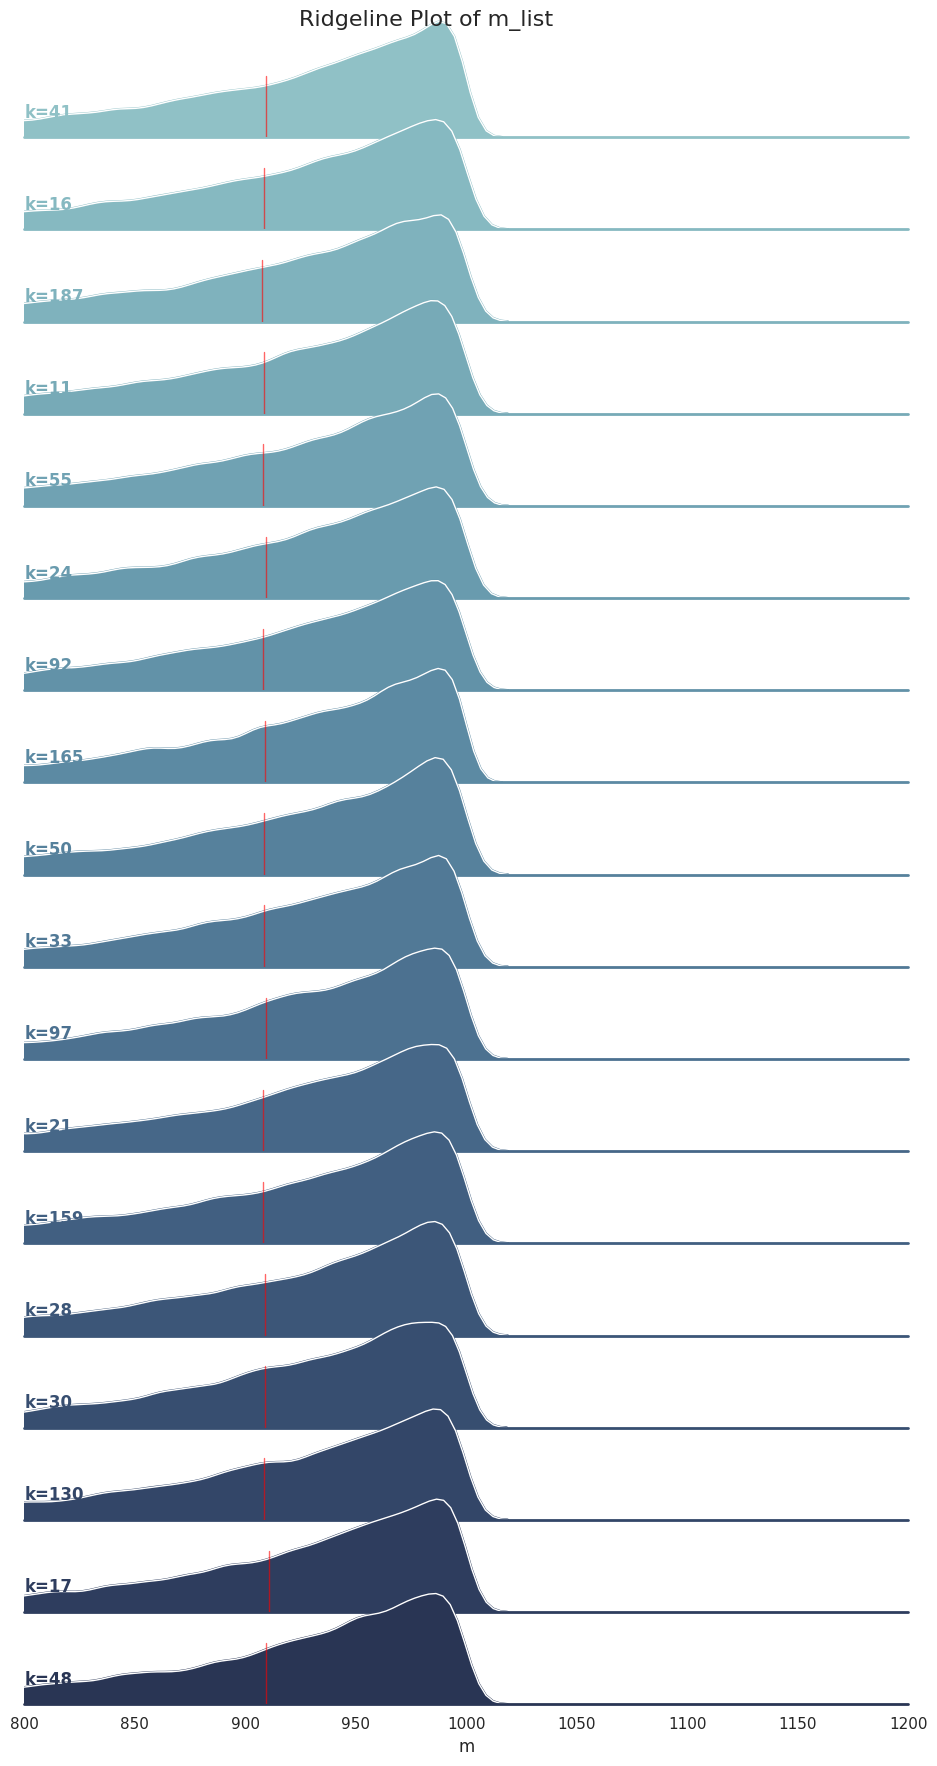

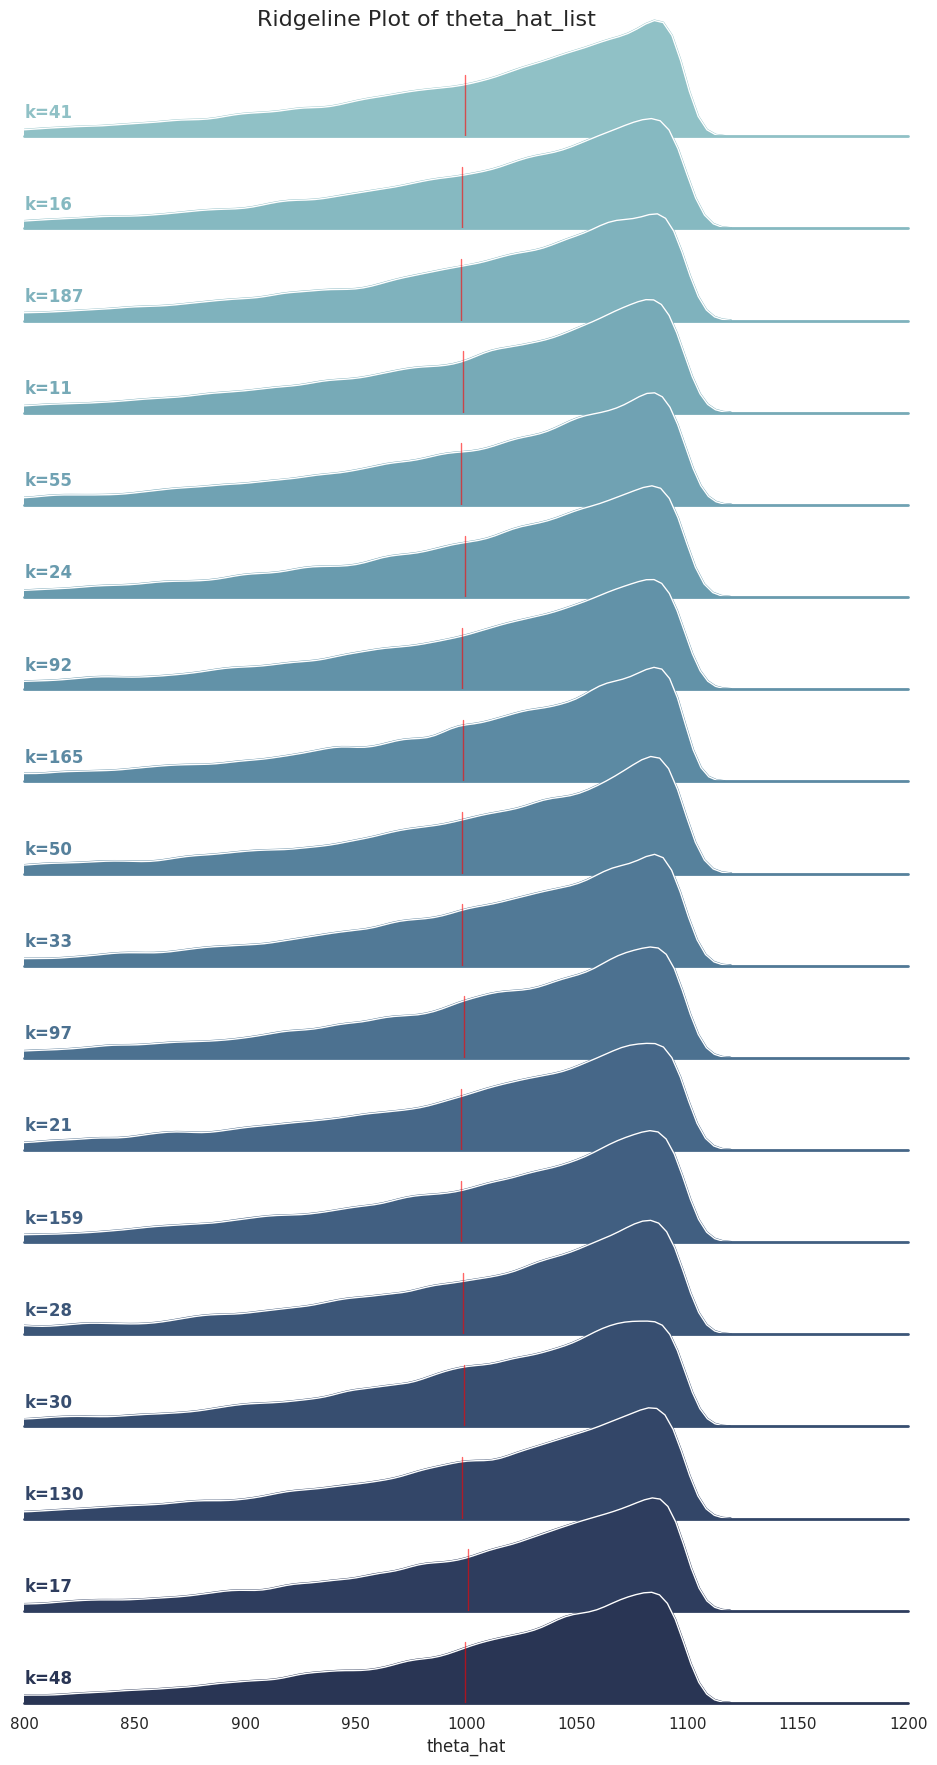

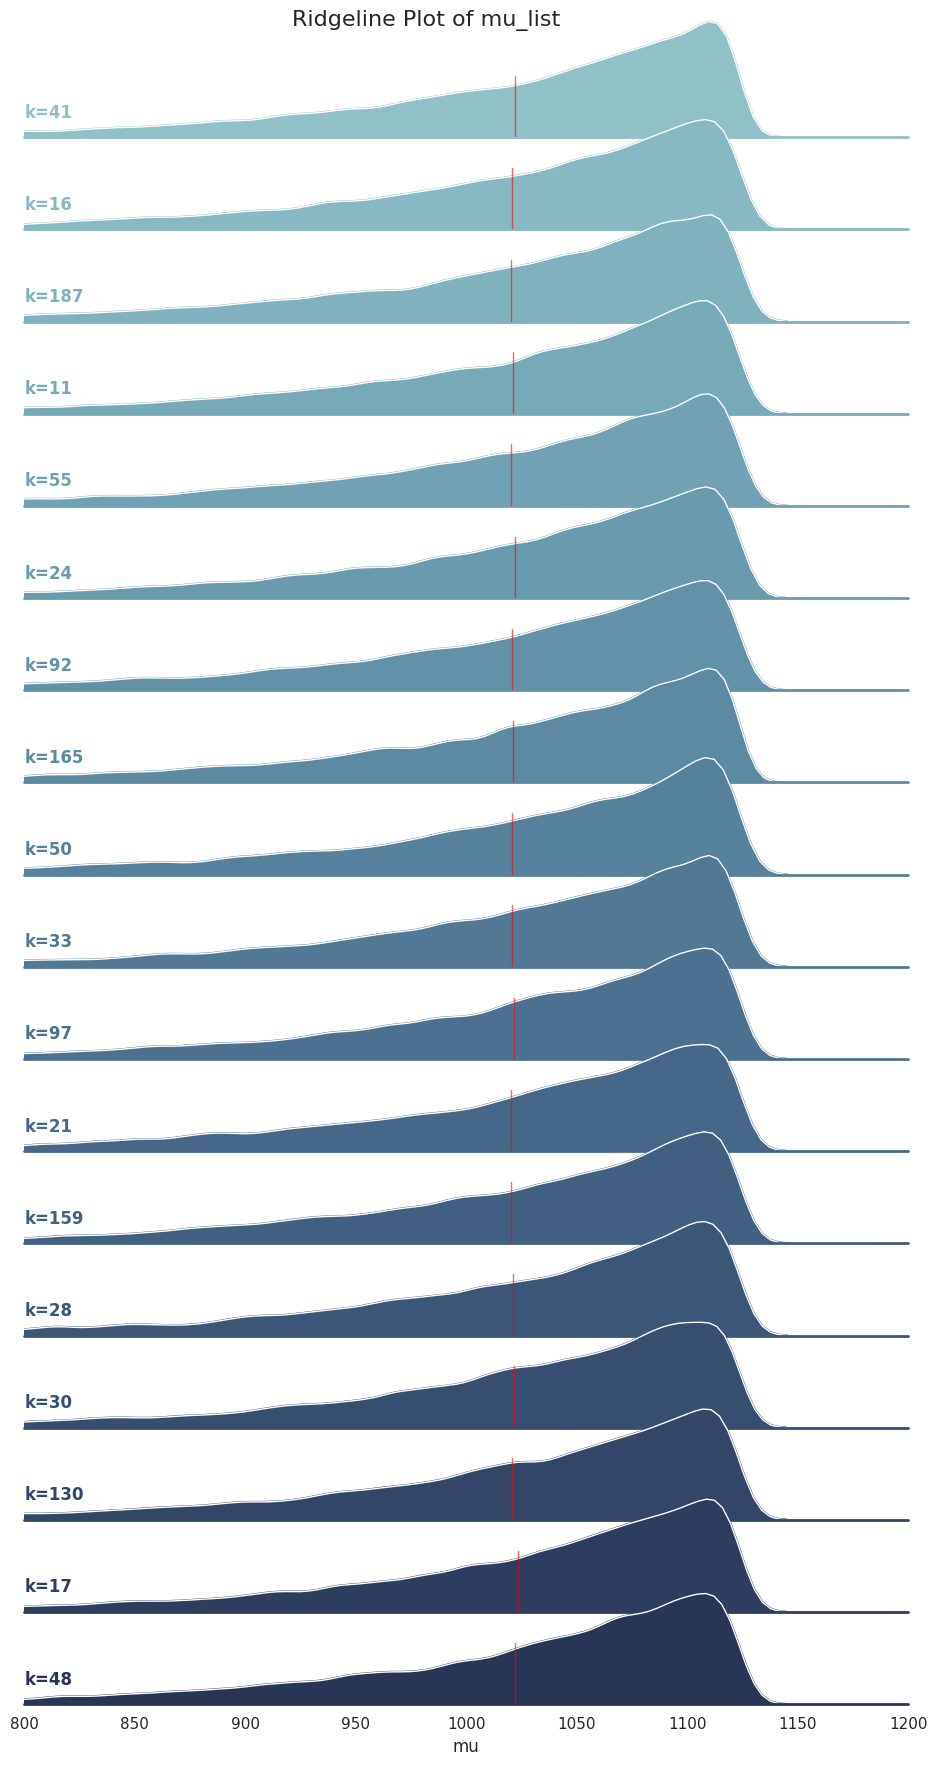

In [13]:
# Set the theme for the plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Function to create a dataframe for each array (m_list, theta_hat_list, mu_list)
def create_dataframe(array, name):
    df = pd.DataFrame(array.T, columns=[f'k={k_list[i]}' for i in range(num_ks)])
    df_melted = df.melt(var_name='k', value_name=name)
    return df_melted


# Create dataframes for each list
m_df = create_dataframe(m_list, 'm')
theta_hat_df = create_dataframe(theta_hat_list, 'theta_hat')
mu_df = create_dataframe(mu_list, 'mu')


# Function to calculate and plot vertical line at the mean of each distribution
def add_mean_line(data, **kwargs):
    mean_value = data.mean()
    plt.axvline(x=mean_value, color='red', alpha = 0.6, linestyle='-', lw=1, ymax = 0.5)


# Function to create ridgeline plot with FacetGrid
def ridgeline_plot(data, var_name, title):
    # Define the color palette
    pal = sns.cubehelix_palette(num_ks, rot=-.25, light=.7)

    # Initialize the FacetGrid object
    g = sns.FacetGrid(data, row="k", hue="k", aspect=10, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, var_name,
          bw_adjust=.5, clip_on=(800,1200),
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, var_name, clip_on=(800,1200), color="w", lw=1, bw_adjust=.5)

    # Add a reference line for better visualization
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Add vertical lines for the mean of each distribution
    g.map(add_mean_line, var_name)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, var_name)
    g.set(xlim=(800,1200))
    # Set the subplots to overlap and adjust spacing
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.suptitle(title, fontsize=16)
    plt.show()

# Ridgeline plot for m_list
ridgeline_plot(m_df, 'm', 'Ridgeline Plot of m_list')

# Ridgeline plot for theta_hat_list
ridgeline_plot(theta_hat_df, 'theta_hat', 'Ridgeline Plot of theta_hat_list')

# Ridgeline plot for mu_list
ridgeline_plot(mu_df, 'mu', 'Ridgeline Plot of mu_list')


# Analyzing knowledge retrieval impairments associated with Alzheimer's disease

Run the cell below to retrieve the data.

In [ ]:
fluencydata_NC = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['NC'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

fluencydata_PAD = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['ProbAD'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

The cell below shows the two fluency lists that were acquired from patient 0 in group NC

In [ ]:
fluencydata_NC.labeledlists[2]

In [ ]:
fluencydata_PAD.labeledlists[1]

The cell below shows the same data but the animal names have been replaced by their associated integers

In [ ]:
fluencydata_NC.lists[0]

The animal name -> integer mapping can be seen using the code below

In [ ]:
fluencydata_NC.items[0]

## 1)

In [ ]:
# Write your code here

nb_NC = ...
nb_lists_nc = ...
nb_items_nc = ...

In [ ]:
# Write your code here

nb_PAD = ...
nb_lists_pad = ...
nb_items_pad = ...

### An estimated network is represented as a symmetrical matrix of zeroes and ones. Each row or column in the matrix represents a concept. A value of one in the matrix denotes an edge between two concepts, while zero denotes no edge.

The cell below computes the semantic network associated to patient 2 in the NC group.

In [ ]:
naive_network = snafu.naiveRandomWalk(fluencydata_NC.lists[2])

In [ ]:
fig = px.imshow(naive_network,
                labels=dict(x="X-axis", y="Y-axis", color="Values"),
                title="Adjacency Matrix")
fig.update_layout(
    width=500,  # Set the width of the plot
    height=500  # Set the height of the plot
)

# Show the plot
fig.show()

### The cell below shows the graph representation of the semantic network computed above.

In [ ]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(naive_network)

# Set node labels using the animal names
node_labels = fluencydata_NC.items[2]

# Get positions for the nodes (spring layout)
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_color='lightblue', font_weight='bold', node_size=700)

# Draw labels (animal names) at the node positions
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set plot title
plt.title("Graph Visualization with Animal Names as Node Labels")

# Show the plot
plt.show()

The cells below shows how to retrieve the properties of a graph G using the networkx library

In [ ]:
nx.average_shortest_path_length(G)

In [ ]:
nx.diameter(G)

In [ ]:
nx.number_of_nodes(G)

In [ ]:
nx.number_of_edges(G)

In [ ]:
nodedegree = (nx.number_of_edges(G)*2)/nx.number_of_nodes(G)
nodedegree

##2)

In [ ]:
# Write your code here

networks_nc = ...

aspl_nc = ...
diameter_nc = ...
number_of_nodes_nc = ...
number_of_edges_nc = ...

mean_aspl_nc = ...
mean_diameter_nc = ...
mean_nodes_nc = ...
mean_edges_nc = ...

In [ ]:
# Write your code here

networks_pad = ...

aspl_pad = ...
diameter_pad = ...
number_of_nodes_pad = ...
number_of_edges_pad = ...

mean_aspl_pad = ...
mean_diameter_pad = ...
mean_nodes_pad = ...
mean_edges_pad = ...

## 3)
You can use the numpy function np.nanmean() to compute the mean of a numpy array that will disregard the "NaN"s in it.  

### You can modify the code below to plot your data or write your own

In [ ]:
# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_nc
fig.add_trace(go.Histogram(x=aspl_nc, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_nc
fig.add_trace(go.Scatter(x=[mean_aspl_nc, mean_aspl_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_nc
fig.add_trace(go.Histogram(x=diameter_nc, name="Diameter"), row=1, col=2)
# Add mean line for diameter_nc
fig.add_trace(go.Scatter(x=[mean_diameter_nc, mean_diameter_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_nc
fig.add_trace(go.Histogram(x=number_of_nodes_nc, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_nc
fig.add_trace(go.Scatter(x=[mean_nodes_nc, mean_nodes_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_nc
fig.add_trace(go.Histogram(x=number_of_edges_nc, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_nc
fig.add_trace(go.Scatter(x=[mean_edges_nc, mean_edges_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


### You can modify the code below to plot your data or write your own

In [ ]:
# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_pad
fig.add_trace(go.Histogram(x=aspl_pad, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_pad
fig.add_trace(go.Scatter(x=[mean_aspl_pad, mean_aspl_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_pad
fig.add_trace(go.Histogram(x=diameter_pad, name="Diameter"), row=1, col=2)
# Add mean line for diameter_pad
fig.add_trace(go.Scatter(x=[mean_diameter_pad, mean_diameter_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_pad
fig.add_trace(go.Histogram(x=number_of_nodes_pad, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_pad
fig.add_trace(go.Scatter(x=[mean_nodes_pad, mean_nodes_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_pad
fig.add_trace(go.Histogram(x=number_of_edges_pad, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_pad
fig.add_trace(go.Scatter(x=[mean_edges_pad, mean_edges_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


## 5)

In [ ]:
# Write your code here

def generate_random_permutation(f_list):
  return

def generate_permuted_flists(fluency_data):
  return


## 6)

## 7)

In [ ]:
# Write your code here

nb_samples = ...
aspl_pad_permuted = ...
diameter_pad_permuted = ...
number_of_nodes_pad_permuted = ...
number_of_edges_pad_permuted = ...

In [ ]:
# Write your code here

aspl_nc_permuted = ...
diameter_nc_permuted = ...
number_of_nodes_nc_permuted = ...
number_of_edges_nc_permuted = ...

##8)